### Logistic Regression
Logistic regression model is used when the probability of an event occuring has to be predicted.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

#### <font color='blue'>Read data</font>
In this demo, we will use coronary heart disease (chd) dataset, which gives the details about the chances of having chd, given the age.

In [2]:
chd = pd.read_csv("datasets/chd_data.csv")

In [3]:
chd.head() # Reading the first 5 rows

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


#### <font color='blue'>Feature Engineering</font>
Let us visualize the data to have insights on building the model.

Text(0.5, 1.0, 'Age vs. Coronary Heart Disease')

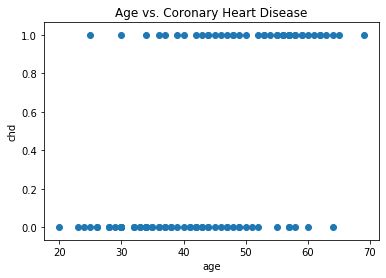

In [4]:
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary Heart Disease")

#### <font color='blue'>Building Logistic Regression model</font>

###### Splitting the data into train and test set

In [5]:
# Importing the required class
from sklearn.model_selection import train_test_split

# Specifying the columns as predictor and target variable
predictors = ["age"]
target = "chd"

X = chd[predictors] # X contains the predictor values or input data 
y = chd[target] # y contains the target labels

# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [7]:
# Importing the required class
from sklearn.linear_model import LogisticRegression

# Creating the object of the class LogisticRegression
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train,y_train)

# Getting the intercept and the coefficients of the model
print("Intercept:",model.intercept_,"\nCoefficients:", model.coef_)

Intercept: [-2.24366107] 
Coefficients: [[0.04128685]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Predicting the probabilities for each of the class labels and the final class for a new data
test=np.array([29]).reshape(1,-1)
print("\nProbabilities:",model.predict_proba(test),"\nChd value:",model.predict(test))


Probabilities: [[0.74007194 0.25992806]] 
Chd value: [0]


#### <font color='blue'>Visualization</font>

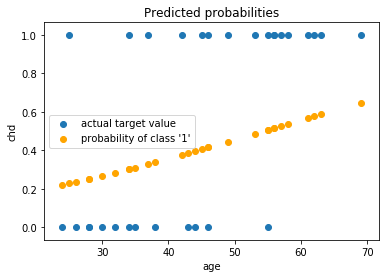

In [14]:
# Getting the probability for class label '1' for all the samples
pred_test = model.predict_proba(X_test)[:,1]

# Plotting the actual class labels or target values for the samples
plt.scatter(X_test['age'],y_test, label = "actual target value")

# Plotting the predicted probability for class label '1' for all the samples
plt.scatter(X_test['age'],pred_test, label = "probability of class '1'",color = "orange", marker='o')

# Adding the xlabel, ylabel, title and the legend
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Predicted probabilities")
plt.legend()

### Evaluating model performance

Accuracy = no. of correct predictions / total predictions

In [17]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train))
print("Accuracy score of the model on test data:", model.score(X_test, y_test))

Accuracy score of the model on training data: 0.7285714285714285
Accuracy score of the model on test data: 0.7
